In [28]:
import numpy as np
import pandas as pd
import networkx as nx
import os
import matplotlib.pyplot as plt

In [44]:
# Comparison between aggr. and non-aggr networks, using gene overlap

input_file_aggr = './final_networks_louise/weigthed_paths_network_Reactome_Dorothea_Aracne_alpha_0.65_aggr' # this is the 'output_file_1.evaluated.filtered_0.67' file
input_file_non_aggr = './final_networks_louise/weigthed_paths_network_Reactome_Dorothea_Aracne_alpha_0.65_non_aggr'
ranking_file_aggr = './final_networks_louise/network_Reactome_Dorothea_Aracne_alpha_0.65_aggr.desc'
ranking_file_non_aggr = './final_networks_louise/network_Reactome_Dorothea_Aracne_alpha_0.65_non_aggr.desc'
N_aggr = 100
N_non_aggr = 100

# Only a gene that is in the top N of aggresive or non-aggresive (or both) is considered
output_file = 'subnetwork_0.65_difference_aggr_non_aggr'+str(N_aggr)+'_'+str(N_non_aggr)+'weighted'+'_overlap'+'.js'
output_file_components_directory = 'subnetwork_0.65_difference_aggr_non_aggr'+str(N_aggr)+'_'+str(N_non_aggr)+'weighted'+'_overlap'+'/'

In [45]:
df_aggr = pd.read_csv(input_file_aggr,sep='[',skiprows=0,header=None)

In [46]:
df_non_aggr = pd.read_csv(input_file_non_aggr,sep='[',skiprows=0,header=None)

In [47]:
def ParseDataframe(df):
    df = df.rename(columns={0: 'path_weight', 1: 'genes_path'})
    df[['gene1','gene2','gene3']] = df['genes_path'].str.split(',',expand=True)
    df[['gene3','brol']] = df['gene3'].str.split(']',expand=True)
    df = df.drop(['brol','genes_path'], axis=1)
    df[['path_weight','brol']] = df['path_weight'].str.rsplit('-',1,expand=True)
    df = df.drop(['brol'], axis=1)
    return df

In [38]:
df_aggr = ParseDataframe(df_aggr)
df_aggr

/tmp/ipykernel_11620/683794502.py:6: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  df[['path_weight','brol']] = df['path_weight'].str.rsplit('-',1,expand=True)


,path_weight,gene1,gene2,gene3
0,1.2891620310636499e-8,'CCNK','EP300','POLR2B'
1,1.2959230777380759e-8,'KIAA2026','EP300','POLR2B'
2,1.2974118056805423e-8,'CEP350','EP300','POLR2B'
3,1.3036734984671319e-8,'RARB','EP300','POLR2B'
4,1.3142328873196124e-8,'LIMK1','EP300','POLR2B'
...,...,...,...,...
1587369,0.0006680610381482449,'DST','MACROD2','CSMD3'
1587370,0.0006680610381482449,'FGF14','MACROD2','CSMD3'
1587371,0.0006680610381482449,'LRRC31','MACROD2','CSMD3'
1587372,0.0006680610381482449,'PLA2G2F','MACROD2','CSMD3'


In [39]:
gene1 = df_aggr['gene1'].tolist()
gene2 = df_aggr['gene2'].tolist()
gene3 = df_aggr['gene3'].tolist()
df_aggr_edges = pd.DataFrame(columns = ['Node1', 'Node2'])
for i in range(10000):
    G = []
    G.append(gene1[i])
    G.append(gene2[i])
    G.append(gene3[i])
    G = sorted(G)
    df_aggr_edges.loc[len(df_aggr_edges)] = [G[0],G[1]]
    df_aggr_edges.loc[len(df_aggr_edges)] = [G[1],G[2]]
    df_aggr_edges.loc[len(df_aggr_edges)] = [G[0],G[2]] 
df_aggr_edges = df_aggr_edges.drop_duplicates()
correction_factor_weighted_paths_aggr = (df_aggr_edges.size/10000)/3
print(correction_factor_weighted_paths_aggr)

0.7190666666666666


In [40]:
df_non_aggr = ParseDataframe(df_non_aggr)
df_non_aggr

/tmp/ipykernel_11620/683794502.py:6: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  df[['path_weight','brol']] = df['path_weight'].str.rsplit('-',1,expand=True)


,path_weight,gene1,gene2,gene3
0,3.532108261764894e-9,'NCOR2','EP300','ASH1L'
1,3.544216300998304e-9,'CABIN1','EP300','ASH1L'
2,3.544216300998304e-9,'RFX7','EP300','ASH1L'
3,3.5445925297855654e-9,'AXIN2','EP300','ASH1L'
4,3.5446459102227196e-9,'REST','EP300','ASH1L'
...,...,...,...,...
8729711,0.00013909494863863808,'ATOH1','KLK12','KLK13'
8729712,0.0001411908810974146,'NTM','CORIN','NETO1'
8729713,0.00017290424727726378,'NCAM2','NETO1','CORIN'
8729714,0.00019639659040128664,'ZFP37','WDR17','ZDBF2'


In [9]:
gene1 = df_non_aggr['gene1'].tolist()
gene2 = df_non_aggr['gene2'].tolist()
gene3 = df_non_aggr['gene3'].tolist()
df_non_aggr_edges = pd.DataFrame(columns = ['Node1', 'Node2'])
for i in range(10000):
    G = []
    G.append(gene1[i])
    G.append(gene2[i])
    G.append(gene3[i])
    G = sorted(G)
    df_non_aggr_edges.loc[len(df_non_aggr_edges)] = [G[0],G[1]]
    df_non_aggr_edges.loc[len(df_non_aggr_edges)] = [G[1],G[2]]
    df_non_aggr_edges.loc[len(df_non_aggr_edges)] = [G[0],G[2]] 
df_non_aggr_edges = df_non_aggr_edges.drop_duplicates()
correction_factor_weighted_paths_non_aggr = (df_non_aggr_edges.size/10000)/3
print(correction_factor_weighted_paths_non_aggr)

0.6645333333333333


In [48]:
df_ranking_aggr = pd.read_csv(ranking_file_aggr,sep='[',skiprows=0,header=None)
df_ranking_non_aggr = pd.read_csv(ranking_file_non_aggr,sep='[',skiprows=0,header=None)

In [49]:
ranking_genes_aggr = df_ranking_aggr[0].values.tolist()
ranking_genes_non_aggr = df_ranking_non_aggr[0].values.tolist()
df_ranking_top_aggr = df_ranking_aggr[0:N_aggr]
df_ranking_top_non_aggr = df_ranking_non_aggr[0:N_non_aggr]
top_genes_aggr = df_ranking_top_aggr[0].values.tolist()
top_genes_non_aggr = df_ranking_top_non_aggr[0].values.tolist()
top_genes2_aggr = []
top_genes2_non_aggr = []
for i in top_genes_aggr:
    a = '\''+i+'\''
    top_genes2_aggr.append(a)
for i in top_genes_non_aggr:
    a = '\''+i+'\''
    top_genes2_non_aggr.append(a)

In [50]:
top_genes_together = []
top_genes_overlap = []
for i in top_genes_aggr:
    top_genes_together.append(i)
for i in top_genes_non_aggr:
    if i not in top_genes_together:
        top_genes_together.append(i)
    else:
        top_genes_overlap.append(i)
        
top_genes2_together = []
top_genes2_overlap = []
for i in top_genes2_aggr:
    top_genes2_together.append(i)
for i in top_genes2_non_aggr:
    if i not in top_genes2_together:
        top_genes2_together.append(i)
    else:
        top_genes2_overlap.append(i)

In [51]:
print(len(top_genes_aggr))
print(len(top_genes_non_aggr))
print(len(top_genes_together))
print(len(top_genes_overlap))
top_genes_overlap

100
100
189
11


['TP53',
 'FAT2',
 'PLCB4',
 'PCDH10',
 'COL11A1',
 'FAT4',
 'KMT2D',
 'DST',
 'DYNC1H1',
 'RYR1',
 'MED12']

In [14]:
df_final_aggr = df_aggr[(df_aggr['gene1'].isin(top_genes2_overlap) & df_aggr['gene2'].isin(top_genes2_overlap)) | (df_aggr['gene1'].isin(top_genes2_overlap) & df_aggr['gene3'].isin(top_genes2_overlap))|(df_aggr['gene2'].isin(top_genes2_overlap) & df_aggr['gene3'].isin(top_genes2_overlap))]
df_final_aggr

,path_weight,gene1,gene2,gene3
0,1.7322998022917186e-8,'PAX6','EP300','TP53'
1,1.7323238772186547e-8,'IL24','EP300','TP53'
2,1.7324057976133982e-8,'TFDP1','EP300','TP53'
3,1.7324695284240434e-8,'KDM6A','EP300','TP53'
4,1.7326760615258647e-8,'RUNX3','EP300','TP53'
...,...,...,...,...
1009530,1.8673765199666813e-5,'FOS','ESR1','OLFML3'
1009697,1.8673765199666813e-5,'PRKACA','ESR1','OLFML3'
1009796,1.886097305151144e-5,'EP300','ESR1','OLFML3'
1009816,1.8910788922480912e-5,'TP53','FOS','GGT5'


In [15]:
df_final_non_aggr = df_non_aggr[(df_non_aggr['gene1'].isin(top_genes2_overlap) & df_non_aggr['gene2'].isin(top_genes2_overlap)) | (df_non_aggr['gene1'].isin(top_genes2_overlap) & df_non_aggr['gene3'].isin(top_genes2_overlap)) | (df_non_aggr['gene2'].isin(top_genes2_overlap) & df_non_aggr['gene3'].isin(top_genes2_overlap))]
df_final_non_aggr

,path_weight,gene1,gene2,gene3
430,4.8040110023523045e-9,'FOS','EP300','FOXA1'
934,4.804673298106619e-9,'PRKACA','EP300','FOXA1'
1852,4.946908221369293e-9,'PRKACA','GNB1','PLCB4'
2182,4.976110178817096e-9,'FOS','EP300','CDH1'
2700,4.978884648937693e-9,'PRKACA','EP300','CDH1'
...,...,...,...,...
5383882,2.2553288772602342e-6,'FOS','ESR1','MN1'
5384162,2.2576731286464385e-6,'PRKACA','ESR1','MN1'
5386439,2.3375914190094742e-6,'TP53','ATM','USP30'
5387337,2.3983902925330054e-6,'TP53','ATM','TAOK2'


In [16]:
def calculateEdges(df,df_final,top_genes,top_genes2,weighted,weight):
    edges = {}
    Normalization = sum(df['path_weight'].astype(float)) # Explained in the paper of OMEN
    for i in range(len(top_genes)):
        print(i)
        for j in range(len(top_genes)-1-i):
            node1 = top_genes[i]
            node2 = top_genes[i+1+j]
            nodes = []
            nodes.append(top_genes2[i])
            nodes.append(top_genes2[i+1+j])
            df_edge = df_final[ (df_final['gene1'].isin(nodes) & df_final['gene2'].isin(nodes)) | (df_final['gene1'].isin(nodes) & df_final['gene3'].isin(nodes)) | (df_final['gene2'].isin(nodes) & df_final['gene3'].isin(nodes))]
            s = sum(df_edge['path_weight'].astype(float))/Normalization
            if s>0:
                if weighted:
                    edges[(node1,node2)] = s*weight
                else:
                    edges[(node1,node2)] = s*100000 # to have bigger values, because they are small probabilities                
    return edges 

In [17]:
edges_aggr = calculateEdges(df_aggr,df_final_aggr,top_genes_overlap,top_genes2_overlap,True,df_aggr.size*correction_factor_weighted_paths_aggr)

0
1
2
3
4
5
6
7
8


In [18]:
edges_non_aggr = calculateEdges(df_non_aggr,df_final_non_aggr,top_genes_overlap,top_genes2_overlap,True,df_non_aggr.size*correction_factor_weighted_paths_non_aggr)

0
1
2
3
4
5
6
7
8


In [19]:
edges_aggr

{('EP300', 'TP53'): 804.5199915516906,
 ('EP300', 'ESR1'): 66.17106449111482,
 ('EP300', 'PRKACA'): 24.340599847350013,
 ('EP300', 'ATM'): 82.36976960630147,
 ('EP300', 'FOS'): 70.18933542552196,
 ('EP300', 'PLCB4'): 16.336928994460788,
 ('EP300', 'ACTG1'): 63.70383354304096,
 ('EP300', 'HSPA8'): 405.93752522595776,
 ('TP53', 'ESR1'): 165.96474333208715,
 ('TP53', 'PRKACA'): 21.96087685331126,
 ('TP53', 'ATM'): 1002.897667392125,
 ('TP53', 'FOS'): 674.64395431522,
 ('TP53', 'PLCB4'): 6.4427080262551515,
 ('TP53', 'ACTG1'): 16.595844421281875,
 ('TP53', 'HSPA8'): 14.718433867379028,
 ('ESR1', 'PRKACA'): 67.64634680112935,
 ('ESR1', 'ATM'): 28.53250849509429,
 ('ESR1', 'FOS'): 112.21731473541317,
 ('ESR1', 'PLCB4'): 9.469167054702549,
 ('ESR1', 'ACTG1'): 4.535857812372507,
 ('ESR1', 'HSPA8'): 30.474488388358726,
 ('PRKACA', 'ATM'): 4.055298588236198,
 ('PRKACA', 'FOS'): 73.03116066916049,
 ('PRKACA', 'PLCB4'): 29.070898731083318,
 ('PRKACA', 'ACTG1'): 14.424798458760971,
 ('PRKACA', 'HSP

In [20]:
edges_non_aggr

{('EP300', 'TP53'): 1120.4911333326397,
 ('EP300', 'ESR1'): 962.5960173129763,
 ('EP300', 'PRKACA'): 675.7352257707206,
 ('EP300', 'ATM'): 65.46966671259281,
 ('EP300', 'FOS'): 819.9230104113497,
 ('EP300', 'PLCB4'): 9.742275324580064,
 ('EP300', 'HSPA8'): 618.4378576079184,
 ('TP53', 'ATM'): 1162.8860925307893,
 ('TP53', 'FOS'): 1010.2103663559582,
 ('TP53', 'PLCB4'): 3.2856484502645675,
 ('ESR1', 'PRKACA'): 610.004996593943,
 ('ESR1', 'ATM'): 15.346900303278806,
 ('ESR1', 'FOS'): 752.8134723634016,
 ('ESR1', 'PLCB4'): 4.830848924309778,
 ('PRKACA', 'ATM'): 2.8938357609331673,
 ('PRKACA', 'FOS'): 180.75846742822566,
 ('PRKACA', 'PLCB4'): 21.378046678712046,
 ('ATM', 'FOS'): 9.285675022491635,
 ('ATM', 'HSPA8'): 16.49746854595594,
 ('FOS', 'PLCB4'): 7.141565260015124,
 ('PLCB4', 'ACTG1'): 7.331987243652889,
 ('PLCB4', 'HSPA8'): 6.1441098690979405}

In [21]:
print(len(edges_aggr))
print(len(edges_non_aggr))

34
22


In [22]:
sum_edges_aggr = 0
sum_edges_non_aggr = 0
for i in edges_aggr:
    sum_edges_aggr = sum_edges_aggr + edges_aggr[i]
for i in edges_non_aggr:
    sum_edges_non_aggr = sum_edges_non_aggr + edges_non_aggr[i]
print('Aggressive:')
print(len(edges_aggr))
print(sum_edges_aggr)
print(sum_edges_aggr/len(edges_aggr))
print('Non-aggressive:')
print(len(edges_non_aggr))
print(sum_edges_non_aggr)
print(sum_edges_non_aggr/len(edges_non_aggr))

Aggressive:
34
3940.372090250405
115.89329677207074
Non-aggressive:
22
8083.204667803807
367.41839399108216


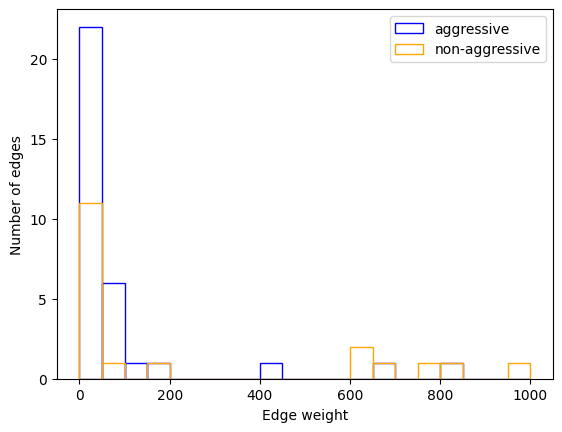

In [23]:
edge_aggr_weights = list(edges_aggr.values())
edge_non_aggr_weights = list(edges_non_aggr.values())
plt.hist(edge_aggr_weights,bins=20,range=[0,1000],edgecolor='blue',fill=False,label='aggressive')
plt.hist(edge_non_aggr_weights,bins=20,range=[0,1000],edgecolor='orange',fill=False,label='non-aggressive')
plt.xlabel('Edge weight')
plt.ylabel('Number of edges')
plt.legend()
plt.savefig('Density_edge_weight_100_100_weighted_overlap.png')

In [24]:
edges_difference_weight = {} # weight = weight aggressive - weight non-aggressive
with open('overview_edge_weights_subnetwork_0.65_difference_aggr_non_aggr_'+str(N_aggr)+'_'+str(N_non_aggr)+'weighted'+'_overlap', 'w') as f:
    f.write('edge  weight_aggr  weight_non_aggr  weight_difference')
    f.write('\n')
    for i in edges_aggr:
        f.write(str(i)+' '+str(edges_aggr[i])+' ')
        if i in edges_non_aggr:
            f.write(str(edges_non_aggr[i])+' ')
            edges_difference_weight[i] = edges_aggr[i]-edges_non_aggr[i]
            f.write(str(edges_difference_weight[i]))
            f.write('\n')
        else:
            f.write(str('no'+' '))
            edges_difference_weight[i] = edges_aggr[i]
            f.write(str(edges_difference_weight[i]))
            f.write('\n')
    for i in edges_non_aggr:
        if i not in edges_difference_weight:
            edges_difference_weight[i] = -edges_non_aggr[i]
            f.write(str(i)+' no'+' '+str(edges_non_aggr[i])+' '+str(edges_difference_weight[i]))
            f.write('\n')
f.close()
print(len(edges_difference_weight))
edges_difference_weight

34


{('EP300', 'TP53'): -315.9711417809491,
 ('EP300', 'ESR1'): -896.4249528218614,
 ('EP300', 'PRKACA'): -651.3946259233705,
 ('EP300', 'ATM'): 16.900102893708663,
 ('EP300', 'FOS'): -749.7336749858277,
 ('EP300', 'PLCB4'): 6.594653669880724,
 ('EP300', 'ACTG1'): 63.70383354304096,
 ('EP300', 'HSPA8'): -212.50033238196067,
 ('TP53', 'ESR1'): 165.96474333208715,
 ('TP53', 'PRKACA'): 21.96087685331126,
 ('TP53', 'ATM'): -159.9884251386643,
 ('TP53', 'FOS'): -335.5664120407382,
 ('TP53', 'PLCB4'): 3.157059575990584,
 ('TP53', 'ACTG1'): 16.595844421281875,
 ('TP53', 'HSPA8'): 14.718433867379028,
 ('ESR1', 'PRKACA'): -542.3586497928137,
 ('ESR1', 'ATM'): 13.185608191815485,
 ('ESR1', 'FOS'): -640.5961576279884,
 ('ESR1', 'PLCB4'): 4.638318130392771,
 ('ESR1', 'ACTG1'): 4.535857812372507,
 ('ESR1', 'HSPA8'): 30.474488388358726,
 ('PRKACA', 'ATM'): 1.1614628273030307,
 ('PRKACA', 'FOS'): -107.72730675906517,
 ('PRKACA', 'PLCB4'): 7.692852052371272,
 ('PRKACA', 'ACTG1'): 14.424798458760971,
 ('PR

In [25]:
df_edges_difference_weight = pd.DataFrame.from_dict(edges_difference_weight,orient='index',columns=['Difference'])
df_edges_difference_weight = df_edges_difference_weight.sort_values(by=['Difference'],ascending=False)
df_edges_difference_weight

,Difference
"(TP53, ESR1)",165.964743
"(EP300, ACTG1)",63.703834
"(ESR1, HSPA8)",30.474488
"(TP53, PRKACA)",21.960877
"(EP300, ATM)",16.900103
"(TP53, ACTG1)",16.595844
"(ATM, HSPA8)",16.104340
"(FOS, ACTG1)",15.278422
"(TP53, HSPA8)",14.718434
"(PRKACA, ACTG1)",14.424798


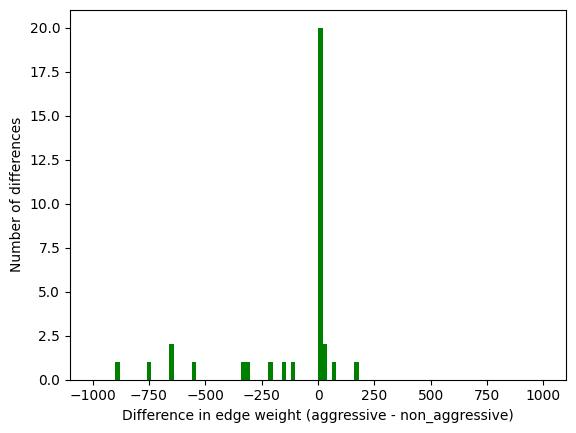

In [26]:
differences = list(df_edges_difference_weight['Difference'])
plt.hist(differences,bins=100,range=[-1000,1000],color='green')
plt.xlabel('Difference in edge weight (aggressive - non_aggressive)')
plt.ylabel('Number of differences')
plt.savefig('Density_edge_weight_difference_100_100_weighted_overlap.png')

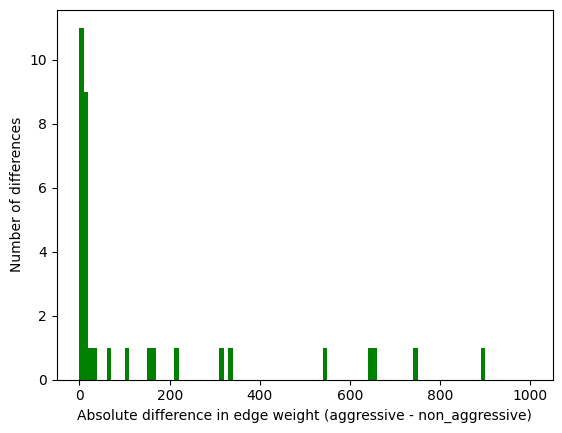

In [27]:
differences_absolute = []
for d in differences:
    if d < 0:
        differences_absolute.append(-1*d)
    else:
        differences_absolute.append(d)
plt.hist(differences_absolute,bins=100,range=[0,1000],color='green')
plt.xlabel('Absolute difference in edge weight (aggressive - non_aggressive)')
plt.ylabel('Number of differences')
plt.savefig('Density_edge_weight_absolute_difference_100_100_weighted_overlap.png')

In [35]:
filter_value = np.percentile(differences_absolute,50)
filter_value

15.691381403629933

In [36]:
len(df_edges_difference_weight.loc[(df_edges_difference_weight['Difference'] > filter_value)])+1

8

In [37]:
len(df_edges_difference_weight.loc[(df_edges_difference_weight['Difference'] < -1*filter_value)])

10

In [31]:
with open(output_file,'w') as f:
    f.write('graph = {')
    f.write('\n')
    f.write('    nodes: [')
    f.write('\n')
    for i in range(len(top_genes_overlap)):
        f.write('        {') 
        f.write('\n')
        f.write('            id: ' + top_genes2_overlap[i] + ',') 
        f.write('\n')
        try:
            f.write('            rank_aggr: ' + str(1+ranking_genes_aggr.index(top_genes_overlap[i])) + ',') 
        except ValueError:
            f.write('            rank_aggr: ' + str(-1) + ',') 
        f.write('\n')
        try:
            f.write('            rank_non_aggr: ' + str(1+ranking_genes_non_aggr.index(top_genes_overlap[i])) + ',') 
        except ValueError:
            f.write('            rank_non_aggr: ' + str(-1) + ',') 
        f.write('\n')
        f.write('        },') 
        f.write('\n')
    f.write('    ],')
    f.write('\n')
    f.write('    links: [')
    f.write('\n')
    for edge in edges_difference_weight:
        if edges_difference_weight[edge] > 0:
            f.write('        {source: "'+ edge[0] +'", target: "'+edge[1]+'", type: "pp_red", direction: "directed", max_cost: '+ str(edges_difference_weight[edge]) +', evidence: ""},')
        else:
            f.write('        {source: "'+ edge[0] +'", target: "'+edge[1]+'", type: "pp_blue", direction: "directed", max_cost: '+ str(-1*edges_difference_weight[edge]) +', evidence: ""},')
        f.write('\n')
    f.write('    ],')
    f.write('\n')
    f.write('}')
f.close()

In [32]:
def componentsFilteredEdges(edges,Filter):
    array1 = []
    for edge in edges:
        if edges[edge]>Filter:
            array1.append(edge)
    G = nx.Graph()
    G.add_edges_from(array1)
    r = list(nx.connected_components(G))
    return r

In [33]:
def writeComponents(edges,Filters):
    edges_pos = {}
    edges_neg = {}
    for e in edges:
        if edges[e]>0:
            edges_pos[e] = edges[e]
        else:
            edges_neg[e] = -1*edges[e]
    for f in Filters:
        components_pos = componentsFilteredEdges(edges_pos,f)
        components_neg = componentsFilteredEdges(edges_neg,f)
        file_pos = 'components_stronger_in_aggr_' + str(f)
        file_neg = 'components_stronger_in_non_aggr_' + str(f)
        with open(output_file_components_directory+file_pos,'w') as f:
            i = 1
            for c in components_pos:
                f.write('Component'+str(i)+': ')
                f.write(str(c))
                f.write('\n')
                i = i + 1
        f.close()
        with open(output_file_components_directory+file_neg,'w') as f:
            i = 1
            for c in components_neg:
                f.write('Component'+str(i)+': ')
                f.write(str(c))
                f.write('\n')
                i = i + 1
        f.close()

In [34]:
path = os.path.join(output_file_components_directory)
os.mkdir(path)
writeComponents(edges_difference_weight,[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12])